In [1]:
import pandas as pd

df = pd.read_csv("train.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


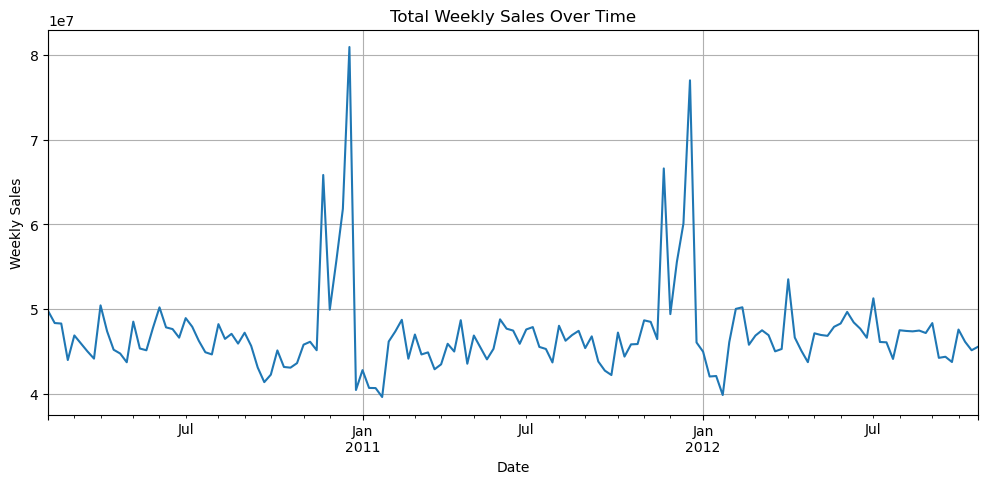

In [2]:
import matplotlib.pyplot as plt

df.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(12,5), title='Total Weekly Sales Over Time')
plt.ylabel("Weekly Sales")
plt.xlabel("Date")
plt.grid()
plt.show()


In [3]:
store1 = df[df['Store'] == 1]
store1 = store1.sort_values('Date')
store1 = store1.set_index('Date')
store1 = store1['Weekly_Sales'].resample('W').sum()
store1.head()


Date
2010-02-07    1643690.90
2010-02-14    1641957.44
2010-02-21    1611968.17
2010-02-28    1409727.59
2010-03-07    1554806.68
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

D:\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


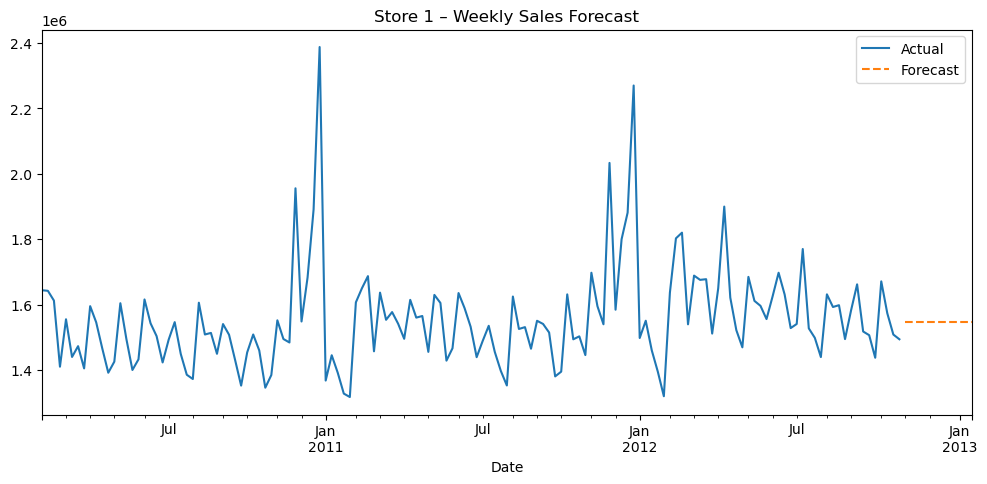

In [4]:
from statsmodels.tsa.api import SimpleExpSmoothing

model = SimpleExpSmoothing(store1).fit()
forecast = model.forecast(12)

# Plot
plt.figure(figsize=(12,5))
store1.plot(label="Actual")
forecast.plot(label="Forecast", linestyle='--')
plt.title("Store 1 – Weekly Sales Forecast")
plt.legend()
plt.show()


In [5]:
from sklearn.metrics import mean_squared_error
import numpy as np

actual = store1[-12:]
rmse = np.sqrt(mean_squared_error(actual, forecast))
print("RMSE:", rmse)


RMSE: 68828.55170218914


In [6]:
import numpy as np
store1_log = np.log1p(store1)

model_log = SimpleExpSmoothing(store1_log).fit()
forecast_log = model_log.forecast(12)

# Convert back
forecast = np.expm1(forecast_log)

# Evaluate again
actual = store1[-12:]
rmse = np.sqrt(mean_squared_error(actual, forecast))
print("Log RMSE:", rmse)


Log RMSE: 69210.98878134208


In [7]:
df['IsHoliday'] = df['IsHoliday'].astype(int)
df.groupby('IsHoliday')['Weekly_Sales'].mean()


IsHoliday
0    15901.445069
1    17035.823187
Name: Weekly_Sales, dtype: float64

In [11]:
! pip install prophet



   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -----------------

01:55:37 - cmdstanpy - INFO - Chain [1] start processing
01:55:39 - cmdstanpy - INFO - Chain [1] done processing


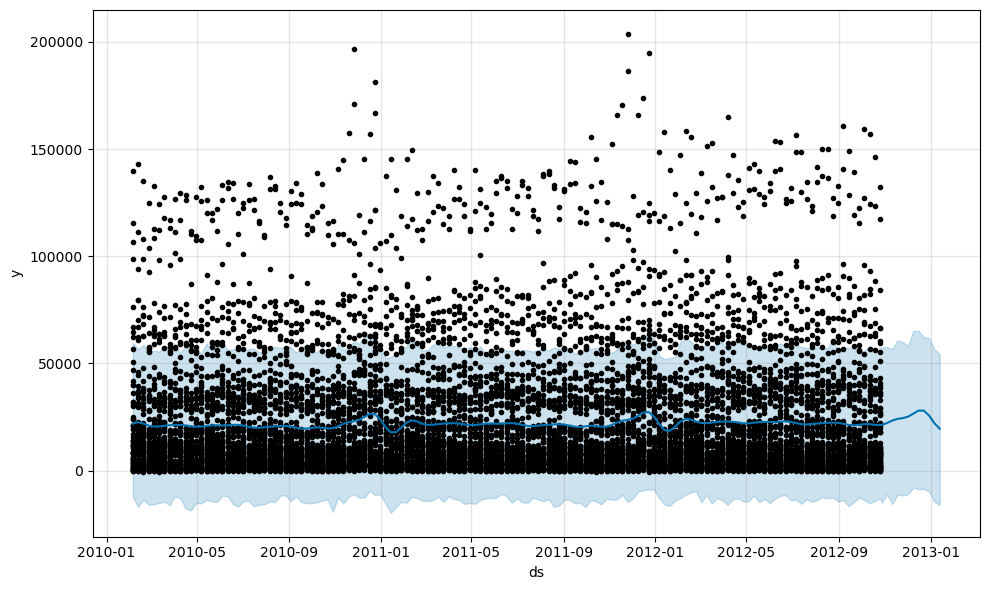

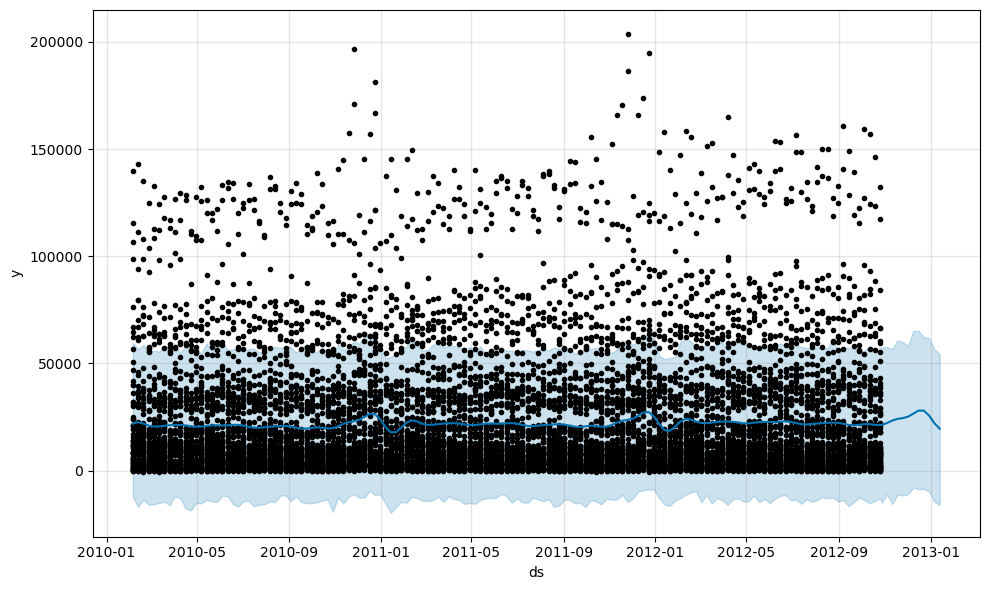

In [12]:
from prophet import Prophet
df_prophet = df[df['Store'] == 1][['Date', 'Weekly_Sales']]
df_prophet.columns = ['ds', 'y']

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

# Plot
model.plot(forecast)


In [13]:
import numpy as np
store1_log = np.log1p(store1)

model_log = SimpleExpSmoothing(store1_log).fit()
forecast_log = model_log.forecast(12)

# Convert back
forecast = np.expm1(forecast_log)

# Evaluate again
actual = store1[-12:]
rmse = np.sqrt(mean_squared_error(actual, forecast))
print("Log RMSE:", rmse)

Log RMSE: 69210.98878134208


In [14]:
df1 = df[df['Store'] == 1][['Date', 'Weekly_Sales']].copy()
df1.columns = ['ds', 'y']
df1 = df1.sort_values('ds')


In [15]:
from prophet import Prophet

model = Prophet()
model.fit(df1)


01:57:59 - cmdstanpy - INFO - Chain [1] start processing
01:58:01 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)


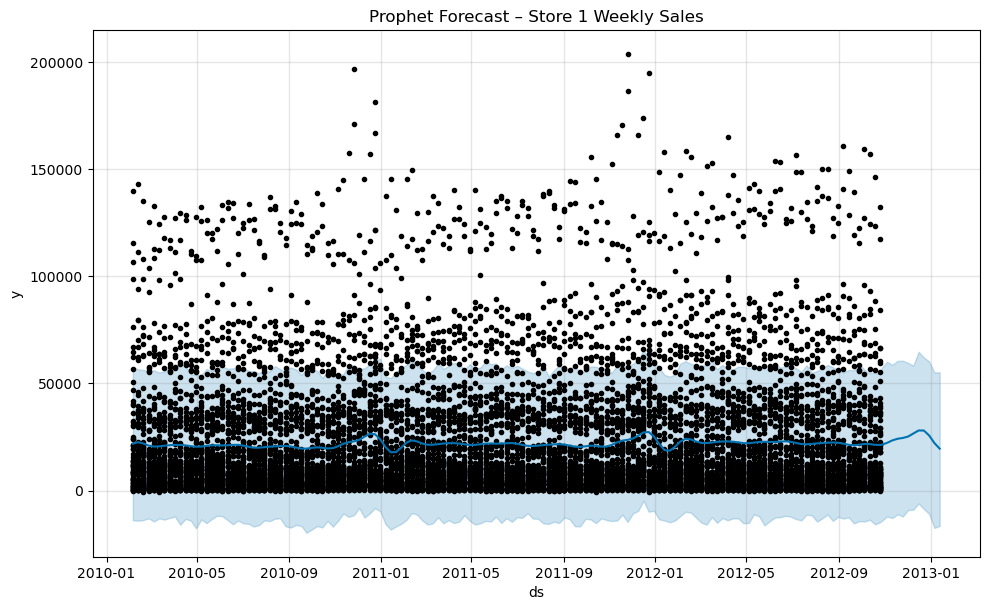

In [17]:
import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.title("Prophet Forecast – Store 1 Weekly Sales")
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np

actual = df1['y'][-12:]
predicted = forecast['yhat'][-12:]

rmse = np.sqrt(mean_squared_error(actual, predicted))
print("Prophet RMSE:", rmse)


Prophet RMSE: 18801.66085656236
